In [1]:
import pickle
import numpy as np
import pandas as pd

# Standard libraries
import math
import os
import urllib.request
from functools import partial
from urllib.error import HTTPError

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

# Torchvision
import torchvision
from torchvision import transforms
from tqdm.notebook import tqdm

## HIST dataset, but very large, I will use PPI instead of HIST dataset, but we can see some details of this time series dataset. ##

In [ ]:
# path_to_protocol5 = 'C:\\Users\\ASUS\\Desktop\\HIST-main\\data\\csi300_market_value_07to20.pkl'     # nodes features
# with open(path_to_protocol5, "rb") as fh:
#   df_market_value = pickle.load(fh)
# # market_value = pickle.load(f)
# print(df_market_value)

                       $market_value
datetime   instrument               
2007-01-04 SH600000     9.345579e+10
           SH600001     1.286856e+10
           SH600004     7.750000e+09
           SH600005     5.345516e+10
           SH600006     6.760000e+09
...                              ...
2020-12-31 SZ300498     1.161880e+11
           SZ300529     5.419600e+10
           SZ300601     1.194070e+11
           SZ300628     6.599000e+10
           SZ300676     5.143700e+10

[1021677 rows x 1 columns]


In [ ]:
# df_stock_index = np.load('C:\\Users\\ASUS\\Desktop\\HIST-main\\data\\csi300_stock_index.npy', allow_pickle=True)    # nodes
# print(df_stock_index)
# df_stock_index = pd.DataFrame([df_stock_index.item()])
# # df_stock_index.to_csv('C:\\Users\\ASUS\\Desktop\\HIST-main\\data\\csi300_stock_index.csv')

{'SH600000': 0, 'SH600001': 1, 'SH600004': 2, 'SH600005': 3, 'SH600006': 4, 'SH600007': 5, 'SH600008': 6, 'SH600009': 7, 'SH600010': 8, 'SH600011': 9, 'SH600012': 10, 'SH600015': 11, 'SH600016': 12, 'SH600018': 13, 'SH600019': 14, 'SH600020': 15, 'SH600021': 16, 'SH600022': 17, 'SH600026': 18, 'SH600027': 19, 'SH600028': 20, 'SH600029': 21, 'SH600030': 22, 'SH600031': 23, 'SH600033': 24, 'SH600035': 25, 'SH600036': 26, 'SH600037': 27, 'SH600048': 28, 'SH600050': 29, 'SH600058': 30, 'SH600060': 31, 'SH600062': 32, 'SH600066': 33, 'SH600068': 34, 'SH600073': 35, 'SH600078': 36, 'SH600085': 37, 'SH600087': 38, 'SH600088': 39, 'SH600089': 40, 'SH600096': 41, 'SH600098': 42, 'SH600100': 43, 'SH600102': 44, 'SH600104': 45, 'SH600108': 46, 'SH600110': 47, 'SH600117': 48, 'SH600118': 49, 'SH600121': 50, 'SH600123': 51, 'SH600125': 52, 'SH600132': 53, 'SH600143': 54, 'SH600150': 55, 'SH600151': 56, 'SH600153': 57, 'SH600160': 58, 'SH600161': 59, 'SH600170': 60, 'SH600171': 61, 'SH600177': 62, '

In [ ]:
# df_feature = np.load('C:\\Users\\ASUS\\Desktop\\HIST-main\\data\\csi300_stock2concept.npy', allow_pickle=True)    # adjasancy matrix # edges
# print(df_feature)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


# PPI DATASET #
### the HIST dataset is very large, and it is the time series type, so I will change to use PPI dataset, it is also a graphical based dataset, and will more fast. ###

In [2]:
########## INSTALL TORCH GEOMETRIC ##################
# https://pytorch-geometric.readthedocs.io/en/latest/ 
#####################################################

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
     -------------------------------------- 107.6/107.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-scatter
Failed to build torch-scatter
  Running setup.py install for torch-scatter: started
  Running setup.py install for torch-scatter: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      No CUDA runtime is found, using CUDA_HOME='C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA\v12.0'
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\torch_scatter
      copying torch_scatter\placeholder.py -> build\lib.win-amd64-cpython-39\torch_scatter
      copying torch_scatter\scatter.py -> build\lib.win-amd64-cpython-39\torch_scatter
      copying torch_scatter\segment_coo.py -> build\lib.win-amd64-cpython-39\torch_scatter
      copying torch_scatter\segment_csr.py -> build\lib.win-amd64-cpython-39\torch_scatter
      copying torch_scatter\testing.py -> build\lib.win-amd64-cpython-39\torch_scatter
      copying torch_scatter\utils.py -> build\lib.win-amd64-cpython-39\torch_scatter
      copying torch_sc

Looking in links: https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
     -------------------------------------- 209.2/209.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-sparse
Failed to build torch-sparse
  Running setup.py install for torch-sparse: started
  Running setup.py install for torch-sparse: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [57 lines of output]
      No CUDA runtime is found, using CUDA_HOME='C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA\v12.0'
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\torch_sparse
      copying torch_sparse\add.py -> build\lib.win-amd64-cpython-39\torch_sparse
      copying torch_sparse\bandwidth.py -> build\lib.win-amd64-cpython-39\torch_sparse
      copying torch_sparse\cat.py -> build\lib.win-amd64-cpython-39\torch_sparse
      copying torch_sparse\coalesce.py -> build\lib.win-amd64-cpython-39\torch_sparse
      copying torch_sparse\convert.py -> build\lib.win-amd64-cpython-39\torch_sparse
      copying torch_sparse\diag.py -> build\lib.win-amd64-cpython-39\torch_sparse
      copying torch_sparse\eye.py -> build\lib.win-am

Looking in links: https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
     -------------------------------------- 53.8/53.8 kB 926.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-cluster
Failed to build torch-cluster
  Running setup.py install for torch-cluster: started
  Running setup.py install for torch-cluster: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      No CUDA runtime is found, using CUDA_HOME='C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA\v12.0'
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\torch_cluster
      copying torch_cluster\fps.py -> build\lib.win-amd64-cpython-39\torch_cluster
      copying torch_cluster\graclus.py -> build\lib.win-amd64-cpython-39\torch_cluster
      copying torch_cluster\grid.py -> build\lib.win-amd64-cpython-39\torch_cluster
      copying torch_cluster\knn.py -> build\lib.win-amd64-cpython-39\torch_cluster
      copying torch_cluster\nearest.py -> build\lib.win-amd64-cpython-39\torch_cluster
      copying torch_cluster\radius.py -> build\lib.win-amd64-cpython-39\torch_cluster
      copying torch_cluster\rw.py -> build\l

Looking in links: https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-spline-conv
Failed to build torch-spline-conv
  Running setup.py install for torch-spline-conv: started
  Running setup.py install for torch-spline-conv: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      No CUDA runtime is found, using CUDA_HOME='C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA\v12.0'
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\torch_spline_conv
      copying torch_spline_conv\basis.py -> build\lib.win-amd64-cpython-39\torch_spline_conv
      copying torch_spline_conv\conv.py -> build\lib.win-amd64-cpython-39\torch_spline_conv
      copying torch_spline_conv\testing.py -> build\lib.win-amd64-cpython-39\torch_spline_conv
      copying torch_spline_conv\weighting.py -> build\lib.win-amd64-cpython-39\torch_spline_conv
      copying torch_spline_conv\__init__.py -> build\lib.win-amd64-cpython-39\torch_spline_conv
      running egg_info
      writing torch_spline_conv.egg-info\PKG-INFO
    

In [40]:
#####################################################
################## PACKAGES #########################
#####################################################
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch_geometric.nn as graphnn
from sklearn.metrics import f1_score
from torch_geometric.datasets import PPI
from torch_geometric.loader import DataLoader

In [41]:
### LOAD DATASETS ###

BATCH_SIZE = 2 

# Train Dataset
train_dataset = PPI(root="", split='train')
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
# Val Dataset
val_dataset = PPI(root="", split='val')
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
# Test Dataset
test_dataset = PPI(root="", split='test')
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Number of features and classes
n_features, n_classes = train_dataset[0].x.shape[1], train_dataset[0].y.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)
print("Number of classes per node: ", n_classes)

Number of samples in the train dataset:  20
Number of samples in the val dataset:  2
Number of samples in the test dataset:  2
Output of one sample from the train dataset:  Data(x=[1767, 50], edge_index=[2, 32318], y=[1767, 121])
Edge_index :
tensor([[   0,    0,    0,  ..., 1744, 1745, 1749],
        [ 372, 1101,  766,  ..., 1745, 1744, 1739]])
Number of features per node:  50
Number of classes per node:  121


In [38]:
# ###############################################
# # GCN + self attention (multihead attention) #              ！！！！！！(新搭的混合模型)！！！！！
# ###############################################

# class EncoderBlock(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, input_dim, num_heads, dim_feedforward, dropout=0.0):
#         """
#         Args:
#             input_dim: Dimensionality of the input
#             num_heads: Number of heads to use in the attention block
#             dim_feedforward: Dimensionality of the hidden layer in the MLP
#             dropout: Dropout probability to use in the dropout layers
#         """
#         super().__init__()
        
#         self.gcn = nn.Sequential(
#           graphnn.GCNConv(input_size, hidden_size),
#           nn.ReLU(),
#           graphnn.GCNConv(hidden_size, output_size),
#           nn.ReLU(),
#           nn.BatchNorm2d(output_size)
#         )
        
#         self.fc_layer = nn.Linear(input_size, output_size)
#         # torch.nn.init.xavier_uniform_(self.fc_layer.weight)
#         input_dim = output_size

#         # Attention layer
#         self.self_attn = nn.MultiheadAttention(input_dim, input_dim, num_heads)

#         # Two-layer MLP
#         self.linear_net = nn.Sequential(
#             nn.Linear(input_dim, dim_feedforward),
#             nn.Dropout(dropout),
#             nn.ReLU(inplace=True),
#             nn.Linear(dim_feedforward, input_dim),
#         )

#         # Layers to apply in between the main layers
#         self.norm1 = nn.LayerNorm(input_dim)
#         self.norm2 = nn.LayerNorm(input_dim)
#         self.dropout = nn.Dropout(dropout)

#     def forward(self, x, mask=None):
#         # Attention part
#         attn_out = self.self_attn(x, mask=mask)
#         x = x + self.dropout(attn_out)
#         x = self.norm1(x)

#         # MLP part
#         linear_out = self.linear_net(x)
#         x = x + self.dropout(linear_out)
#         x = self.norm2(x)

#         return x

In [42]:
# #####################################################
# ################## MODEL ############################
# #####################################################

# ############################
# ### Graph based nn model ###
# ############################

class BasicGraphModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.graphconv1 = graphnn.GCNConv(input_size, hidden_size)
        self.graphconv2 = graphnn.GCNConv(hidden_size, hidden_size)
        self.graphconv3 = graphnn.GCNConv(hidden_size, output_size)

        self.elu = nn.ELU()

    def forward(self, x, edge_index):

        x = self.graphconv1(x, edge_index)
        x = self.elu(x)
        x = self.graphconv2(x, edge_index)
        x = self.elu(x)
        x = self.graphconv3(x, edge_index)

        return x

In [43]:
###############################################
### + self attention (multihead attention) ####
###############################################

class EncoderBlock(nn.Module):
    def __init__(self, input_dim, num_heads, dim_feedforward, dropout=0.0):
        """
        Args:
            input_dim: Dimensionality of the input
            num_heads: Number of heads to use in the attention block
            dim_feedforward: Dimensionality of the hidden layer in the MLP
            dropout: Dropout probability to use in the dropout layers
        """
        super().__init__()

        # Attention layer
        self.self_attn = nn.MultiheadAttention(input_dim, input_dim, num_heads)

        # Two-layer MLP
        self.linear_net = nn.Sequential(
            nn.Linear(input_dim, dim_feedforward),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.Linear(dim_feedforward, input_dim),
        )

        # Layers to apply in between the main layers
        self.norm1 = nn.LayerNorm(input_dim)
        self.norm2 = nn.LayerNorm(input_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Attention part
        attn_out = self.self_attn(x, mask=mask)
        x = x + self.dropout(attn_out)
        x = self.norm1(x)

        # MLP part
        linear_out = self.linear_net(x)
        x = x + self.dropout(linear_out)
        x = self.norm2(x)

        return x

### Tranformer Self attention explaination ###

In [44]:
class TransformerEncoder(nn.Module):
    def __init__(self, num_layers, **block_args):
        super().__init__()
        self.layers = nn.ModuleList([EncoderBlock(**block_args) for _ in range(num_layers)])

    def forward(self, x, mask=None):
        for layer in self.layers:
            x = layer(x, mask=mask)
        return x

    def get_attention_maps(self, x, mask=None):
        attention_maps = []
        for layer in self.layers:
            _, attn_map = layer.self_attn(x, mask=mask, return_attention=True)
            attention_maps.append(attn_map)
            x = layer(x)
        return attention_maps

In [45]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        """
        Args
            d_model: Hidden dimensionality of the input.
            max_len: Maximum length of a sequence to expect.
        """
        super().__init__()

        # Create matrix of [SeqLen, HiddenDim] representing the positional encoding for max_len inputs
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)

        # register_buffer => Tensor which is not a parameter, but should be part of the modules state.
        # Used for tensors that need to be on the same device as the module.
        # persistent=False tells PyTorch to not add the buffer to the state dict (e.g. when we save the model)
        self.register_buffer("pe", pe, persistent=False)

    def forward(self, x):
        x = x + self.pe[:, : x.size(1)]
        return x

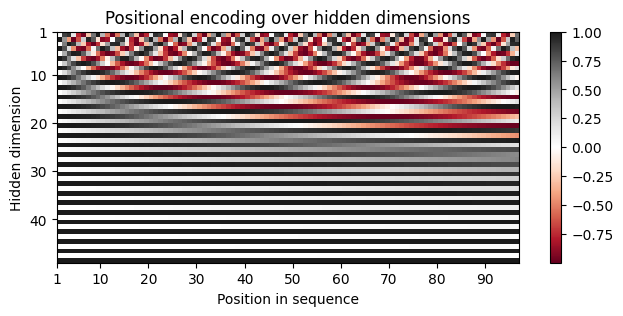

In [46]:
encod_block = PositionalEncoding(d_model=48, max_len=96)
pe = encod_block.pe.squeeze().T.cpu().numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
pos = ax.imshow(pe, cmap="RdGy", extent=(1, pe.shape[1] + 1, pe.shape[0] + 1, 1))
fig.colorbar(pos, ax=ax)
ax.set_xlabel("Position in sequence")
ax.set_ylabel("Hidden dimension")
ax.set_title("Positional encoding over hidden dimensions")
ax.set_xticks([1] + [i * 10 for i in range(1, 1 + pe.shape[1] // 10)])
ax.set_yticks([1] + [i * 10 for i in range(1, 1 + pe.shape[0] // 10)])
plt.show()

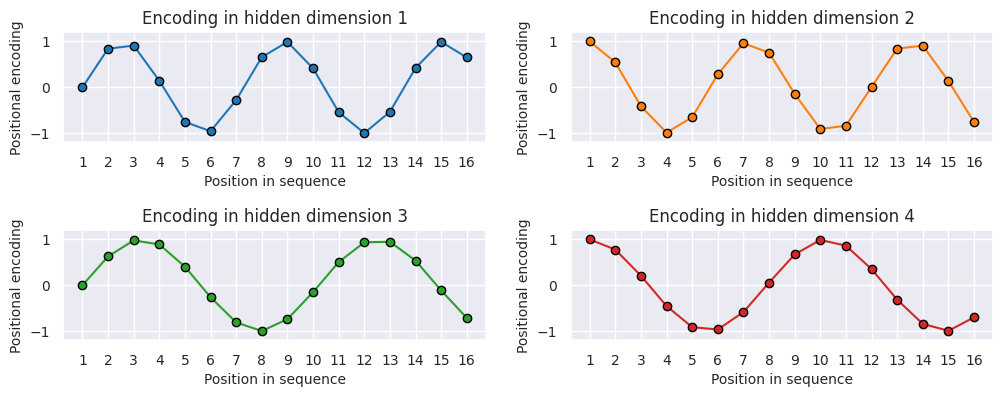

In [47]:
sns.set_theme()
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
ax = [a for a_list in ax for a in a_list]
for i in range(len(ax)):
    ax[i].plot(np.arange(1, 17), pe[i, :16], color="C%i" % i, marker="o", markersize=6, markeredgecolor="black")
    ax[i].set_title("Encoding in hidden dimension %i" % (i + 1))
    ax[i].set_xlabel("Position in sequence", fontsize=10)
    ax[i].set_ylabel("Positional encoding", fontsize=10)
    ax[i].set_xticks(np.arange(1, 17))
    ax[i].tick_params(axis="both", which="major", labelsize=10)
    ax[i].tick_params(axis="both", which="minor", labelsize=8)
    ax[i].set_ylim(-1.2, 1.2)
fig.subplots_adjust(hspace=0.8)
sns.reset_orig()
plt.show()

In [48]:
class CosineWarmupScheduler(optim.lr_scheduler._LRScheduler):
    def __init__(self, optimizer, warmup, max_iters):
        self.warmup = warmup
        self.max_num_iters = max_iters
        super().__init__(optimizer)

    def get_lr(self):
        lr_factor = self.get_lr_factor(epoch=self.last_epoch)
        return [base_lr * lr_factor for base_lr in self.base_lrs]

    def get_lr_factor(self, epoch):
        lr_factor = 0.5 * (1 + np.cos(np.pi * epoch / self.max_num_iters))
        if epoch <= self.warmup:
            lr_factor *= epoch * 1.0 / self.warmup
        return lr_factor

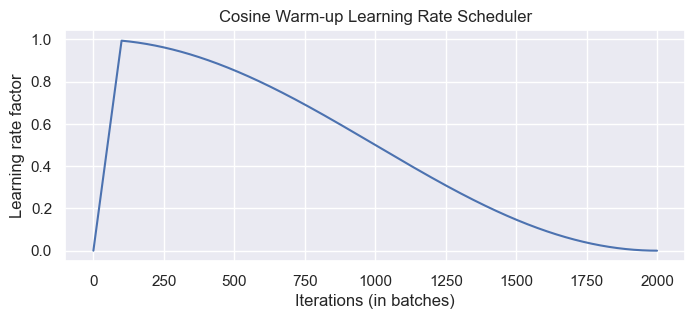

In [49]:
# Needed for initializing the lr scheduler
p = nn.Parameter(torch.empty(4, 4))
optimizer = optim.Adam([p], lr=1e-3)
lr_scheduler = CosineWarmupScheduler(optimizer=optimizer, warmup=100, max_iters=2000)

# Plotting
epochs = list(range(2000))
sns.set()
plt.figure(figsize=(8, 3))
plt.plot(epochs, [lr_scheduler.get_lr_factor(e) for e in epochs])
plt.ylabel("Learning rate factor")
plt.xlabel("Iterations (in batches)")
plt.title("Cosine Warm-up Learning Rate Scheduler")
plt.show()
sns.reset_orig()

In [50]:
input_dim = 64
num_heads = 8
dim_feedforward = 8 

model = EncoderBlock(input_dim, num_heads, dim_feedforward)
model = model.cpu()

In [51]:
#####################################################
############## TRAIN FUNCTION #######################
#####################################################

max_epochs = 20 
LEARNING_RATE = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
# loss_fcn = nn.MSELoss()
    
for epoch in range(max_epochs):
    model.train() #iterations
    losses = []
    for x in enumerate(train_dataloader):
        optimizer.zero_grad() #gradient is 0
        loss = model(x).mean()
        # loss = loss_fcn(x, x)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
            
loss_data = np.array(losses).mean()
print("Epoch {:05d} | Loss: {:.4f}".format(epoch + 1, loss_data))

TypeError: forward() got an unexpected keyword argument 'mask'

In [ ]:
# #####################################################
# ############## TRAIN FUNCTION #######################
# #####################################################
# def train(model, loss_fcn, device, optimizer, max_epochs, train_dataloader, val_dataloader):

#     epoch_list = []
#     scores_list = []

#     # loop over epochs
#     for epoch in range(max_epochs):
#         model.train()
#         losses = []
#         # loop over batches
#         for i, train_batch in enumerate(train_dataloader):
#             optimizer.zero_grad()
#             train_batch_device = train_batch.to(device)
#             # logits is the output of the model
#             logits = model(train_batch_device.x, train_batch_device.edge_index)
#             # compute the loss
#             loss = loss_fcn(logits, train_batch_device.y)
#             # optimizer step
#             loss.backward()
#             optimizer.step()
#             losses.append(loss.item())
#         loss_data = np.array(losses).mean()
#         print("Epoch {:05d} | Loss: {:.4f}".format(epoch + 1, loss_data))

#         if epoch % 5 == 0:
#             # evaluate the model on the validation set
#             # computes the f1-score (see next function)
#             score = evaluate(model, loss_fcn, device, val_dataloader)
#             print("F1-Score: {:.4f}".format(score))
#             scores_list.append(score)
#             epoch_list.append(epoch)

#     return epoch_list, scores_list

In [ ]:
# #####################################################
# ############### TEST FUNCTION #######################
# #####################################################
# def evaluate(model, loss_fcn, device, dataloader):

#     score_list_batch = []

#     model.eval()
#     for i, batch in enumerate(dataloader):
#         batch = batch.to(device)
#         output = model(batch.x, batch.edge_index)
#         loss_test = loss_fcn(output, batch.y)
#         predict = np.where(output.detach().cpu().numpy() >= 0, 1, 0)
#         score = f1_score(batch.y.cpu().numpy(), predict, average="micro")
#         score_list_batch.append(score)

#     return np.array(score_list_batch).mean()

In [ ]:
# ### DEVICE GPU OR CPU : will select GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print("\nDevice: ", device)

# ### Max number of epochs
# max_epochs = 120

# ### DEFINE LOSS FUNCTION
# loss_fcn = nn.BCEWithLogitsLoss()

# ### DEFINE OPTIMIZER
# optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# ### TRAIN THE MODEL
# epoch_list, basic_model_scores = train(model, loss_fcn, device, optimizer, max_epochs, train_dataloader, val_dataloader)


Device:  cpu
Epoch 00001 | Loss: 0.4748
F1-Score: 0.5582
Epoch 00002 | Loss: 0.4724
Epoch 00003 | Loss: 0.4693
Epoch 00004 | Loss: 0.4678
Epoch 00005 | Loss: 0.4660
Epoch 00006 | Loss: 0.4647
F1-Score: 0.5593
Epoch 00007 | Loss: 0.4631
Epoch 00008 | Loss: 0.4619
Epoch 00009 | Loss: 0.4609
Epoch 00010 | Loss: 0.4600
Epoch 00011 | Loss: 0.4589
F1-Score: 0.5644
Epoch 00012 | Loss: 0.4583
Epoch 00013 | Loss: 0.4575
Epoch 00014 | Loss: 0.4569
Epoch 00015 | Loss: 0.4559
Epoch 00016 | Loss: 0.4557
F1-Score: 0.5709
Epoch 00017 | Loss: 0.4540
Epoch 00018 | Loss: 0.4537
Epoch 00019 | Loss: 0.4531
Epoch 00020 | Loss: 0.4521
Epoch 00021 | Loss: 0.4502
F1-Score: 0.5873
Epoch 00022 | Loss: 0.4493
Epoch 00023 | Loss: 0.4483
Epoch 00024 | Loss: 0.4473
Epoch 00025 | Loss: 0.4466
Epoch 00026 | Loss: 0.4460
F1-Score: 0.5746
Epoch 00027 | Loss: 0.4451
Epoch 00028 | Loss: 0.4445
Epoch 00029 | Loss: 0.4440
Epoch 00030 | Loss: 0.4436
Epoch 00031 | Loss: 0.4443
F1-Score: 0.5865
Epoch 00032 | Loss: 0.4434
Epo

Basic Model : F1-Score on the test set: 0.6310


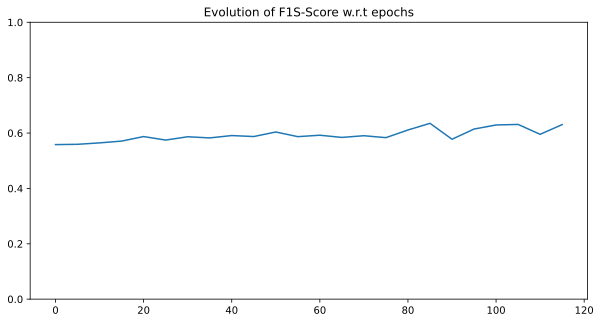

In [ ]:
# ### F1-SCORE ON TEST DATASET
# score_test = evaluate(model, loss_fcn, device, test_dataloader)
# print("Basic Model : F1-Score on the test set: {:.4f}".format(score_test))

# ### PLOT EVOLUTION OF F1-SCORE W.R.T EPOCHS
# def plot_f1_score(epoch_list, scores) :
#     plt.figure(figsize=[10,5])
#     plt.plot(epoch_list, scores)
#     plt.title("Evolution of F1S-Score w.r.t epochs")
#     plt.ylim([0.0, 1.0])
#     plt.show()
    
# plot_f1_score(epoch_list, basic_model_scores)